In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df_event = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
df_region = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

In [3]:
df_event.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df = df_event.merge(df_region, how='left', on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
df = df.rename(columns={'region':'Region', 'notes':'Notes'})
df.shape

(271116, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [8]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [10]:
df.query("Team == 'Indonesia' & Medal=='Gold'").head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
31409,16152,Alexander Alan Budikusuma Wiratama,M,24.0,178.0,71.0,Indonesia,INA,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Men's Singles,Gold,Indonesia,NaN
86511,43865,Tony Gunawan,M,25.0,173.0,80.0,Indonesia,INA,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Doubles,Gold,Indonesia,NaN
95679,48435,Taufik Hidayat,M,23.0,175.0,65.0,Indonesia,INA,2004 Summer,2004,Summer,Athina,Badminton,Badminton Men's Singles,Gold,Indonesia,NaN
146785,73674,Rexy Ronald Mainaky,M,28.0,170.0,65.0,Indonesia,INA,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Men's Doubles,Gold,Indonesia,NaN
231426,116120,Ricky Achmad Subagja,M,25.0,172.0,62.0,Indonesia,INA,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Men's Doubles,Gold,Indonesia,NaN


In [11]:
top_10_countries = df.value_counts('Team').head(10)
top_10_countries

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
dtype: int64

<AxesSubplot:title={'center':'Top 10 Countries Participate In Olympic'}, ylabel='Team'>

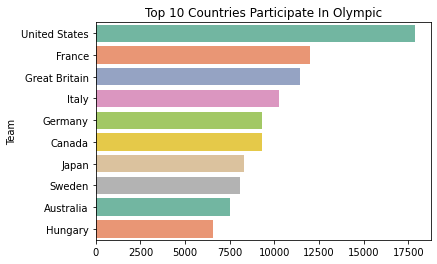

In [12]:
plt.title('Top 10 Countries Participate In Olympic')
sns.barplot(x=top_10_countries, y=top_10_countries.index, palette = 'Set2')

In [13]:
print(np.arange(10,80,2))

[10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56
 58 60 62 64 66 68 70 72 74 76 78]


<AxesSubplot:title={'center':'Athletes Age Distribution'}, xlabel='Age', ylabel='Number'>

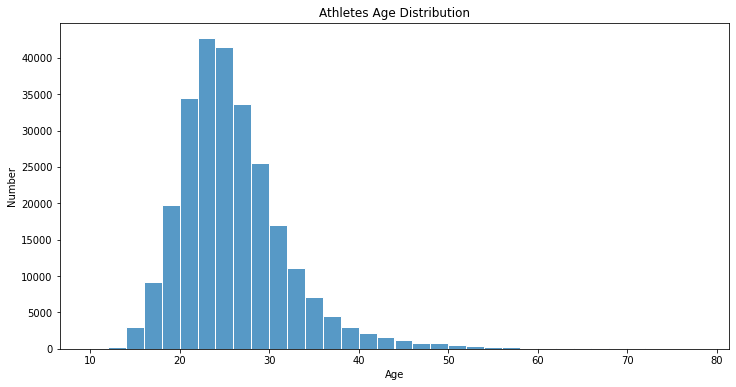

In [14]:
plt.figure(figsize=(12,6))
plt.title('Athletes Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number')
sns.histplot(data=df, x='Age',bins=np.arange(10,80,2), edgecolor='white')

In [15]:
winter_sport = df.query("Season == 'Winter'")['Sport'].unique()
winter_sport

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

<AxesSubplot:>

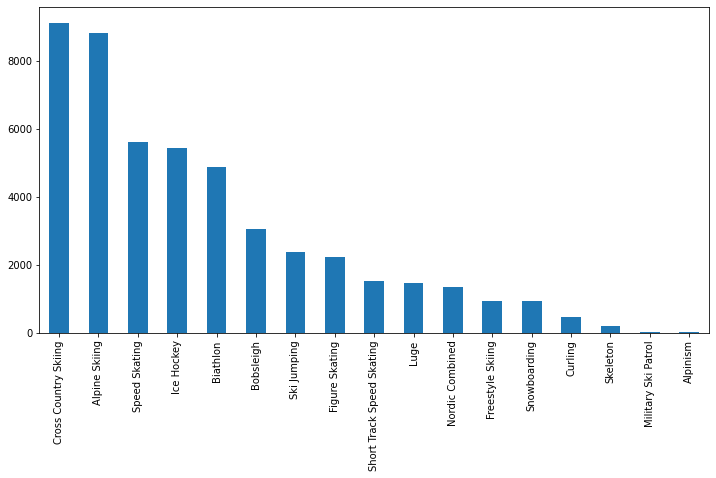

In [16]:
plt.figure(figsize=(12,6))
df.query("Season == 'Winter'")['Sport'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='count', ylabel='Sport'>

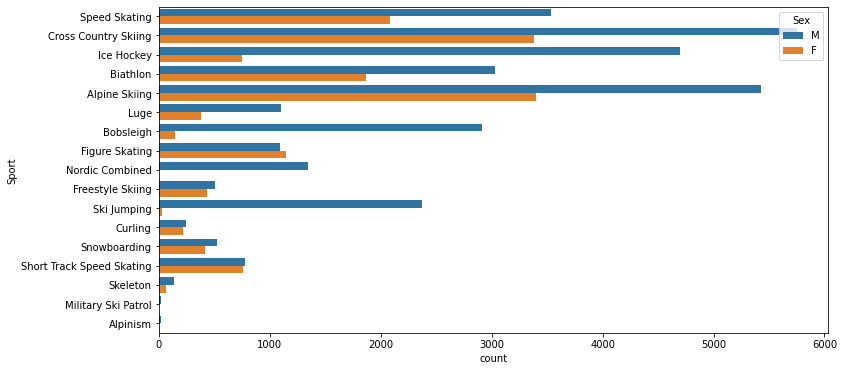

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y = df.query("Season == 'Winter'")['Sport'], hue='Sex')

In [18]:
summer_sport = df.query("Season == 'Summer'")['Sport'].unique()
summer_sport

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

<AxesSubplot:>

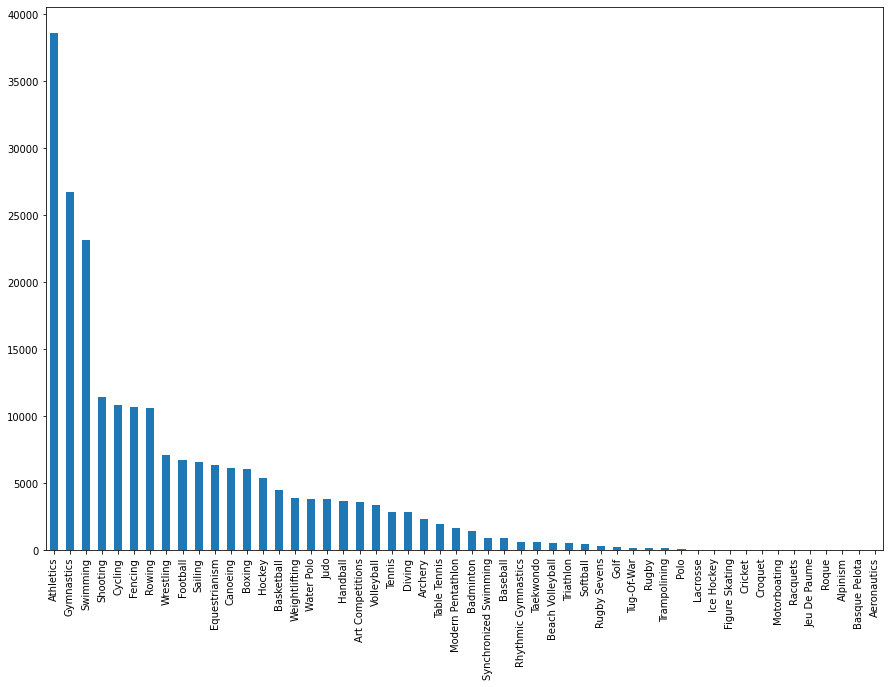

In [19]:
plt.figure(figsize=(15,10))
df.query("Season == 'Summer'")['Sport'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='count', ylabel='Sport'>

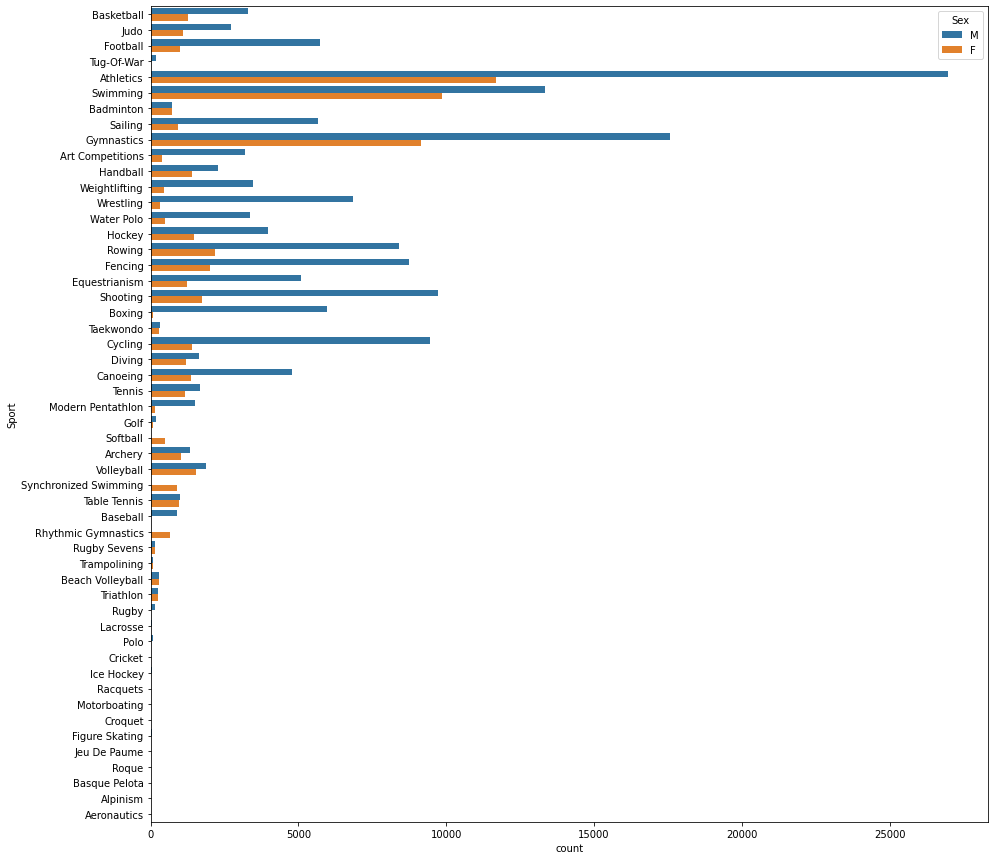

In [20]:
plt.figure(figsize=(15,15))
sns.countplot(data=df, y = df.query("Season == 'Summer'")['Sport'], hue='Sex')

In [21]:
sex_counts = df['Sex'].value_counts()
sex_counts

M    196594
F     74522
Name: Sex, dtype: int64

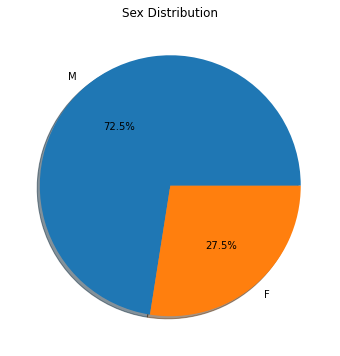

In [22]:
plt.figure(figsize=(12,6))
plt.title('Sex Distribution')
plt.pie(sex_counts, labels=sex_counts.index,shadow=True,autopct='%1.1f%%')
plt.show()

In [23]:
df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

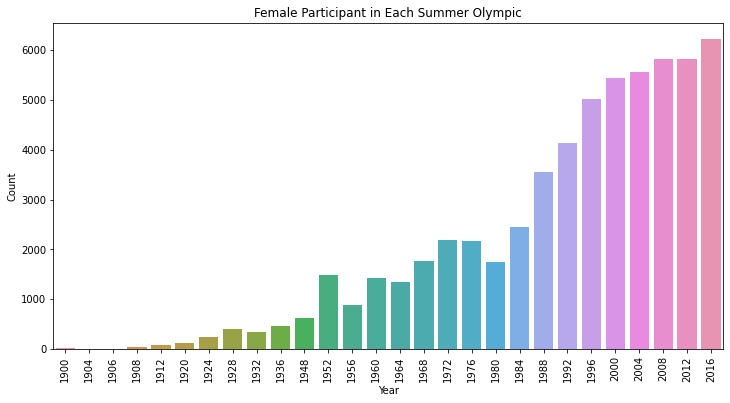

In [24]:
female_participant_summer = df.query("Sex == 'F' & Season == 'Summer'")[['Sex','Year']]
female_participant_summer = female_participant_summer.groupby('Year').count().reset_index()
plt.figure(figsize=(12,6))
plt.title('Female Participant in Each Summer Olympic')
plt.xticks(rotation=90)
sns.barplot(data=female_participant_summer,x='Year',y='Sex')
plt.ylabel('Count')
plt.show()

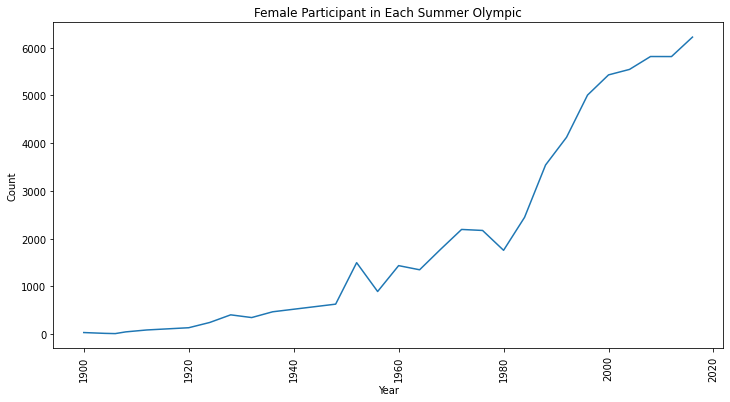

In [25]:
plt.figure(figsize=(12,6))
plt.title('Female Participant in Each Summer Olympic')
plt.xticks(rotation=90)
sns.lineplot(data=female_participant_summer,x='Year',y='Sex')
plt.ylabel('Count')
plt.show()

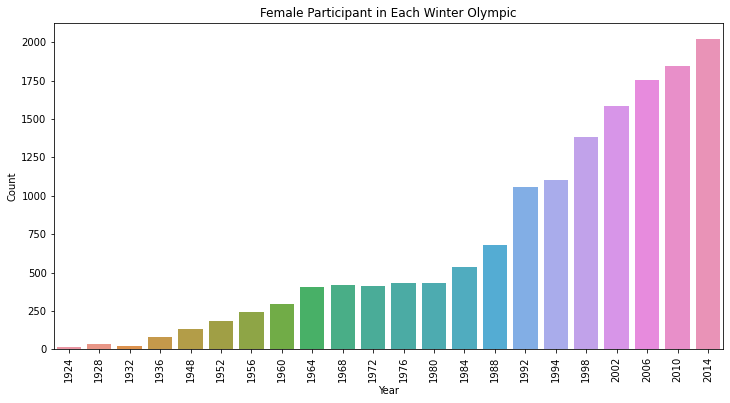

In [26]:
female_participant_winter = df.query("Sex == 'F' & Season == 'Winter'")[['Sex','Year']]
female_participant_winter = female_participant_winter.groupby('Year').count().reset_index()
plt.figure(figsize=(12,6))
plt.title('Female Participant in Each Winter Olympic')
plt.xticks(rotation=90)
sns.barplot(data=female_participant_winter,x='Year',y='Sex')
plt.ylabel('Count')
plt.show()

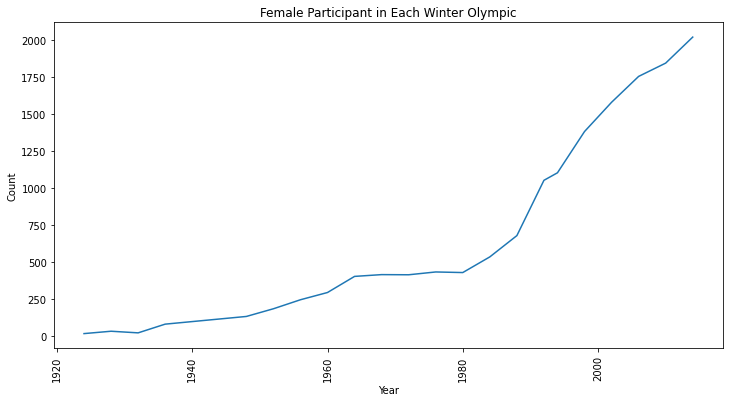

In [27]:
plt.figure(figsize=(12,6))
plt.title('Female Participant in Each Winter Olympic')
plt.xticks(rotation=90)
sns.lineplot(data=female_participant_winter,x='Year',y='Sex')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

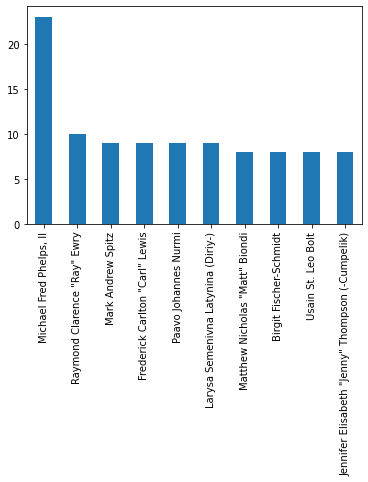

In [28]:
goldMedal_person = df[df['Medal']=='Gold']['Name'].value_counts()
goldMedal_person.head(10).plot(kind='bar')

<AxesSubplot:>

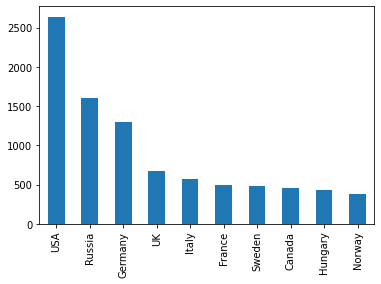

In [29]:
goldMedal_country = df[df['Medal']=='Gold']['Region'].value_counts()
goldMedal_country.head(10).plot(kind='bar')

In [30]:
oldgold = df[df['Medal']=='Gold'][['Name','Age','Sport']].sort_values('Age',ascending=False)
oldgold.head(10)

,Name,Age,Sport
233390,Oscar Gomer Swahn,64.0,Shooting
105199,Charles Jacobus,64.0,Roque
226374,"Galen Carter ""G. C."" Spencer",63.0,Archery
190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",63.0,Archery
261102,"Robert W. Williams, Jr.",63.0,Archery
104003,Isaac Lazarus Israls,63.0,Art Competitions
233387,Oscar Gomer Swahn,60.0,Shooting
159298,Joshua Kearney Millner,60.0,Shooting
233386,Oscar Gomer Swahn,60.0,Shooting
261675,Walter Winans,60.0,Art Competitions


In [31]:
df_rio = df[df['Year']==2016]
df_rio

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271024,135528,Marc Zwiebler,M,32.0,181.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN,Germany,NaN
271053,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Kazakhstan,NaN
271054,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN,Kazakhstan,NaN
271055,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Kazakhstan,NaN


In [32]:
top_10 = df_rio.groupby('Team')[['Medal']].count()
top_10.sort_values('Medal',ascending=False).head(10)

,Medal
Team,
United States,256
Germany,157
Great Britain,145
Russia,113
China,109
France,96
Australia,82
Italy,70
Canada,69


Text(0.5, 1.0, 'Height vs Weight Olympic Participant')

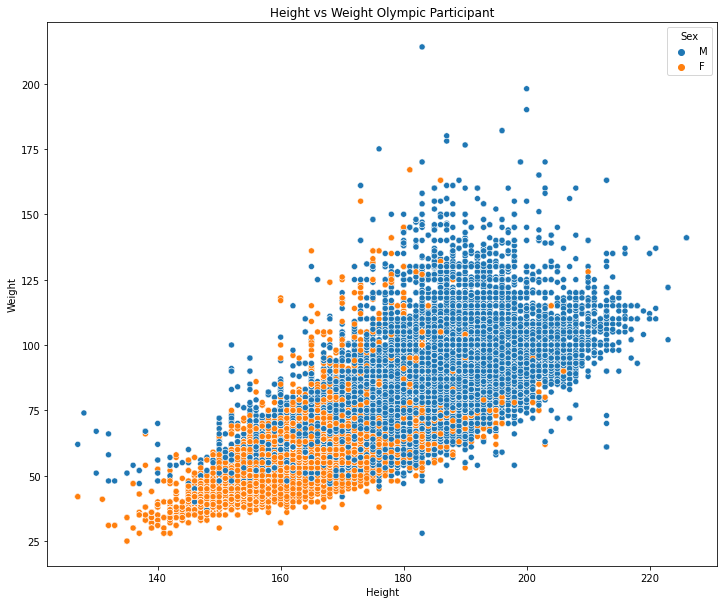

In [33]:
not_null_HW = df[(df['Height'].notnull()) & (df['Weight'].notnull())]
plt.figure(figsize=(12,10))
sns.scatterplot(x='Height',y='Weight',data=not_null_HW, hue='Sex')
plt.title('Height vs Weight Olympic Participant')

In [34]:
not_null_HW[['Name','Sport','Height']].sort_values('Height',ascending=False).drop_duplicates(subset='Name',keep='first').head(10)

,Name,Sport,Height
265041,Yao Ming,Basketball,226.0
207375,Arvydas Romas Sabonis,Basketball,223.0
32376,Tommy Loren Burleson,Basketball,223.0
59372,Roberto Dueas Hernndez,Basketball,221.0
17669,Gunther Behnke,Basketball,221.0
269053,Zhang Zhaoxu,Basketball,221.0
141983,"Lucien James ""Luc"" Longley",Basketball,220.0
181241,Viktor Aleksandrovich Pankrashkin,Basketball,220.0
240657,Volodymyr Petrovych Tkachenko,Basketball,220.0
196667,Peter John Ramos Fuentes,Basketball,219.0
